<a href="https://colab.research.google.com/github/mluong74766/Project_Portfolio/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
# Read the 'Median_Household_Income_2015.csv' file into a DataFrame
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
# Read the 'Pct_People_Below_Poverty_Level.csv' file into a DataFrame
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
# Read the 'Pct_Over_25_Completed_High_School.csv' file into a DataFrame
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
# Read the 'Share_of_Race_By_City.csv' file into a DataFrame
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
# Read the 'Deaths_by_Police_US.csv' file into a DataFrame
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Get the shape of the 'df_hh_income' DataFrame
df_hh_income.shape
# Get the shape of the 'df_pct_completed_hs' DataFrame
df_pct_completed_hs.shape
# Get the shape of the 'df_fatalities' DataFrame
df_fatalities.shape
# Get the shape of the 'df_share_race_city' DataFrame
df_share_race_city.shape
# Get the shape of the 'df_pct_poverty' DataFrame
df_pct_poverty.shape
# Print Columns_Names
print(f'Column names for hh_income: {df_hh_income.columns}')
print(f'Column names for pct_completed_hs: {df_pct_completed_hs.columns}')
print(f'Column names for fatalities: {df_fatalities.columns}')
print(f'Column names for share_race_city: {df_share_race_city.columns}')
print(f'Column names for pct_poverty: {df_pct_poverty.columns}')

Column names for hh_income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Column names for pct_completed_hs: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Column names for fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Column names for share_race_city: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Column names for pct_poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


0        False
1        False
2        False
3        False
4        False
         ...  
29317    False
29318    False
29319    False
29320    False
29321    False
Length: 29322, dtype: bool

In [ ]:
# Check for missing values in the 'df_fatalities' DataFrame
df_fatalities.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2531,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2532,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
# Fill missing values with 0 in the 'df_hh_income' DataFrame
df_hh_income.fillna(0,inplace=True)
# Fill missing values with 0 in the 'df_fatalities' DataFrame
df_fatalities.fillna(0,inplace=True)
# Fill missing values with 0 in the 'df_pct_completed_hs' DataFrame
df_pct_completed_hs.fillna(0,inplace=True)
# Fill missing values with 0 in the 'df_pct_poverty' DataFrame
df_pct_poverty.fillna(0,inplace=True)
# Fill missing values with 0 in the 'df_share_race_city' DataFrame
df_share_race_city.fillna(0,inplace=True)

NameError: ignored

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
# Convert the 'poverty_rate' column to numeric, rounding down to the nearest integer
df_pct_poverty['poverty_rate']= np.floor(pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')).astype('Int64')
# Group the DataFrame by 'Geographic Area' and calculate the mean of 'poverty_rate'
df=df_pct_poverty.groupby(['Geographic Area'],as_index=False).agg({'poverty_rate':pd.Series.mean})
# Sort the DataFrame by 'poverty_rate' in descending order
df.sort_values('poverty_rate',ascending=False,inplace=True)
# Rename the 'Geographic Area' column to 'Geographic_Area'
df.rename(columns={'Geographic Area': 'Geographic_Area'},inplace=True)
fig=px.bar(x=df.Geographic_Area,
           y=df.poverty_rate,
           title="State Poverty",)
# Customize the layout of the plot
fig.update_layout(
    xaxis_title="Geographic Area",
    yaxis_title="Poverty Rate",
)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
# Convert the 'percent_completed_hs' column to numeric, rounding down to the nearest integer
df_pct_completed_hs['percent_completed_hs']= np.floor(pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')).astype('Int64')
# Replace "-" values with 0 in the 'percent_completed_hs' column
df_pct_completed_hs.replace("-",0,inplace=True)
# Sort the DataFrame by 'percent_completed_hs' in descending order
df_pct_completed_hs.sort_values('percent_completed_hs',ascending=False,inplace=True)
# Rename the 'Geographic Area' column to 'Geographic_Area'
df_pct_completed_hs.rename(columns={'Geographic Area': 'Geographic_Area'},inplace=True)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.

In [ ]:
# Group the DataFrame by 'Geographic_Area' and calculate the mean of 'percent_completed_hs' for each group
df_sorted=df_pct_completed_hs.groupby(['Geographic_Area'],as_index=False).agg({'percent_completed_hs':pd.Series.mean})
# Sort the DataFrame by 'percent_completed_hs' in descending order
df_sorted.sort_values('percent_completed_hs',ascending=False,inplace=True)

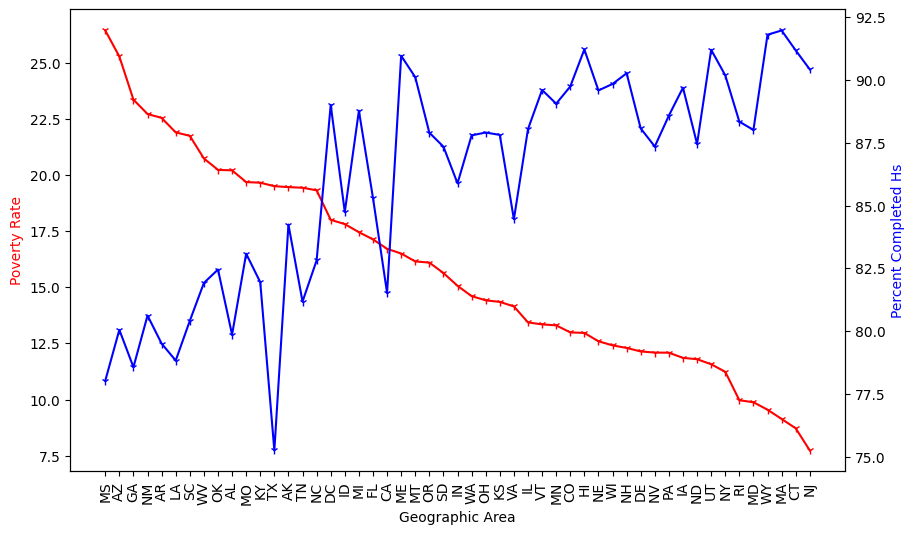

In [ ]:
# Merge the 'df' and 'df_sorted' DataFrames based on the 'Geographic_Area' column
merge=pd.merge(df,df_sorted,on=['Geographic_Area'])
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the poverty rate
ax.plot(merge.Geographic_Area,
        merge.poverty_rate,
        color="red",
        marker="1",
        )

# Set the x-axis label
ax.set_xlabel("Geographic Area")
# Set the y-axis label for the poverty rate
ax.set_ylabel("Poverty Rate",
              color="red")

# Create a second y-axis
ax2=ax.twinx()
# Plot the percentage of people who completed high school
ax2.plot(merge.Geographic_Area, merge.percent_completed_hs,color="blue",marker="1")
# Set the y-axis label for the percentage of people who completed high school
ax2.set_ylabel("Percent Completed Hs",color="blue")
# Set the x-axis tick labels
xticks = merge.Geographic_Area[::1]  # Adjust the step size as needed
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation=90)

Certainly! Here's the updated code with documentation:

python
Copy code
# Merge the 'df' and 'df_sorted' DataFrames based on the 'Geographic_Area' column
merge = pd.merge(df, df_sorted, on=['Geographic_Area'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the poverty rate
ax.plot(merge.Geographic_Area,
        merge.poverty_rate,
        color="red",
        marker="1")

# Set the x-axis label
ax.set_xlabel("Geographic Area")

# Set the y-axis label for the poverty rate
ax.set_ylabel("Poverty Rate", color="red")

# Create a second y-axis
ax2 = ax.twinx()

# Plot the percentage of people who completed high school
ax2.plot(merge.Geographic_Area,
         merge.percent_completed_hs,
         color="blue",
         marker="1")

# Set the y-axis label for the percentage of people who completed high school
ax2.set_ylabel("Percent Completed Hs", color="blue")

# Set the x-axis tick labels
xticks = merge.Geographic_Area[::1]  # Adjust the step size as needed
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation=90)

# Display the plot
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

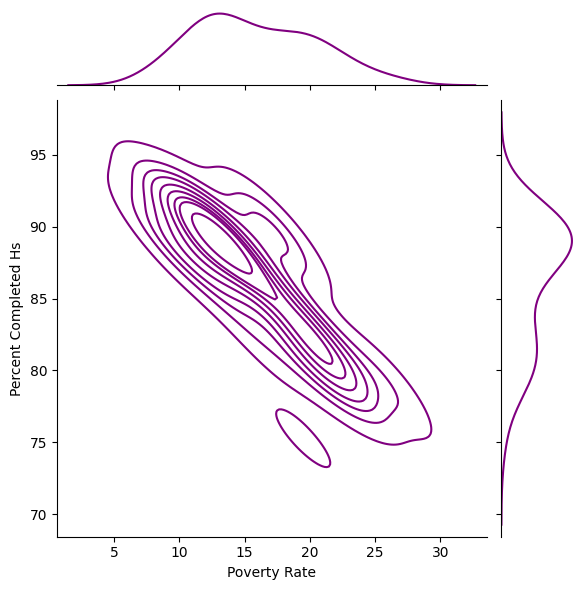

In [ ]:
# Create a joint plot with kernel density estimation (KDE)
sns.jointplot(data=merge, x='poverty_rate', y='percent_completed_hs', kind='kde', color='purple')
# Set the x-axis label
# Set the y-axis label
plt.ylabel('Percent Completed Hs')
# Display the plot
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

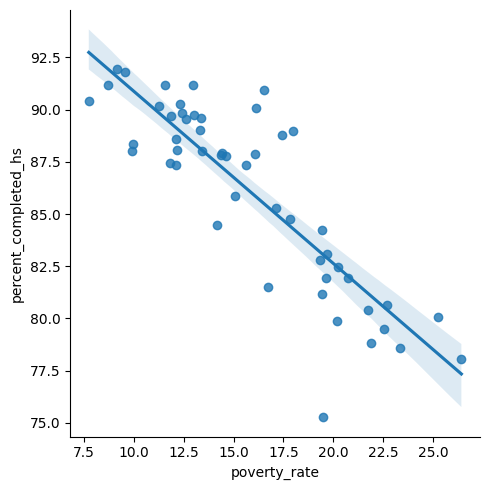

In [ ]:
# Create a scatter plot with a linear regression line
sns.lmplot(data=merge, x='poverty_rate', y='percent_completed_hs')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
# Convert the selected columns to numeric values
df_share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']]=df_share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']].apply(lambda x:pd.to_numeric(x,errors="coerce"))

In [ ]:
# Rename the 'Geographic area' column to 'Geographic_Area'
df_share_race_city.rename(columns={'Geographic area':'Geographic_Area'},inplace=True)


In [ ]:
# Grouping the race columns by geographic area and calculating the sum
df_race=df_share_race_city.groupby(['Geographic_Area'],as_index=False).agg({'share_white':pd.Series.sum,'share_black':pd.Series.sum,'share_native_american':pd.Series.sum,'share_asian':pd.Series.sum,'share_hispanic':pd.Series.sum})

In [ ]:
# Creating a bar chart to visualize the racial makeup by geographic area
# Setting x-axis and y-axis labels
fig=px.bar(df_race,x='Geographic_Area',
           y=['share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
           title="Racial Makeup")
fig.update_xaxes(title_text='Geographic Area')
fig.update_yaxes(title_text='Population Share')
# Displaying the chart
fig.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

Text(0, 0.5, '# of Male and Female')

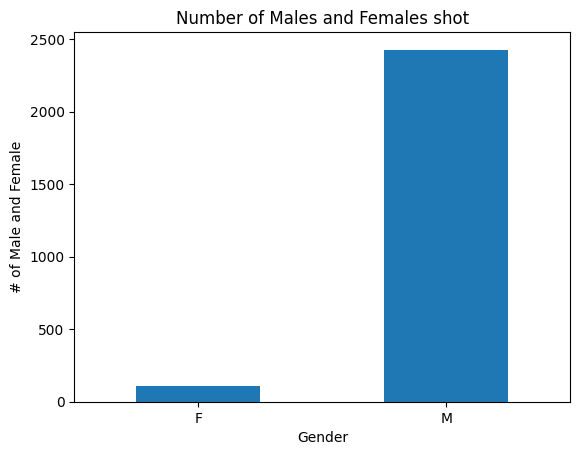

In [ ]:
# Counting the number of males and females in the dataset
gender_count=df_fatalities.groupby('gender')['gender'].count()
# Creating a bar plot to visualize the number of males and females shot
gender_count.plot(kind='bar',rot=0)
# Setting the title, x-axis label, and y-axis label for the plot
plt.title('Number of Males and Females shot')
plt.xlabel('Gender')
plt.ylabel('# of Male and Female')




In [ ]:
# Group the fatalities DataFrame by 'gender' and 'manner_of_death' and count the occurrences of each combination
grouped_fatalities=df_fatalities.groupby(['gender','manner_of_death'],as_index=False).value_counts()
# Display the grouped_fatalities DataFrame
grouped_fatalities

,gender,manner_of_death,id,name,date,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,count
0,F,shot,16,Autumn Steele,06/01/15,unarmed,34.00,W,Burlington,IA,False,other,Not fleeing,True,1
1,F,shot,20,Jessie Hernandez,26/01/15,vehicle,17.00,H,Denver,CO,False,other,Not fleeing,False,1
2,F,shot,2807,Susan Teel,26/07/17,knife,62.00,0,Vero Beach,FL,True,attack,Not fleeing,False,1
3,F,shot,2779,Justine Damond,15/07/17,unarmed,40.00,W,Minneapolis,MN,False,undetermined,Not fleeing,False,1
4,F,shot,2782,India N. Nelson,17/07/17,gun,25.00,0,Norfolk,VA,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,M,shot and Tasered,1059,David Winesett,05/12/15,straight edge razor,51.00,W,Miami,FL,False,other,Not fleeing,True,1
2531,M,shot and Tasered,1088,Jeffrey Gene Evans,14/12/15,knife,52.00,W,Middle River,MD,True,other,Not fleeing,False,1
2532,M,shot and Tasered,1138,Sean O'Brien,02/01/16,knife,37.00,W,Livingston,MT,False,other,Not fleeing,False,1
2533,M,shot and Tasered,1160,David Zollo,05/01/16,knife,54.00,W,Upper Darby,PA,True,other,Not fleeing,False,1


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:

# Create a box plot using plotly express
fig = px.box(grouped_fatalities, x='age', y='manner_of_death', color='gender')

# Show the plot
fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
# Group the fatalities DataFrame by 'armed' column and count the occurrences of each unique value
armed_count=grouped_fatalities.groupby(['armed'],as_index=False).agg({'count':pd.Series.count})
# Sort the armed_count DataFrame in descending order based on the 'count' column
armed_count.sort_values("count", inplace=True, ascending=False)
# Display the armed_count DataFrame
armed_count

,armed,count
26,gun,1398
33,knife,373
68,vehicle,177
65,unarmed,171
66,undetermined,117
...,...,...
9,bean-bag gun,1
30,hand torch,1
38,metal hand tool,1
36,machete and gun,1


In [ ]:

# Create a bar chart using Plotly Express
fig = px.bar(armed_count[:15], x='armed', y='count', labels={'name':'No. of Deaths'})
# Show the plot
fig.show()

In [ ]:
# Create a bar chart using Plotly Express
fig=px.bar(armed_count,x='armed', y='count')
# Show the plot
fig.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.

In [ ]:
# Calculate the number and percentage of people killed who were under 25 years old
# Count the number of people under age 25
under_25_count = grouped_fatalities[grouped_fatalities['age'] < 25]['age'].count()
# Print the number of people under age 25
print(f'# of people under age 25:{round(under_25_count)}.')
# Count the total number of people killed
total_count=grouped_fatalities['age'].count()
# Print the total number of people killed
print(f'# of people killed:{round(total_count)}.')
# Calculate the percentage of people killed who were under 25 years old
percentage_under_25 = (under_25_count / total_count) * 100
# Print the percentage of people killed who were under 25 years old
print(f'percentage of people killed were under 25 years old:{round(percentage_under_25)}%.')

# of people under age 25:527.
# of people killed:2535.
percentage of people killed were under 25 years old:21%.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

<Axes: xlabel='age', ylabel='Count'>

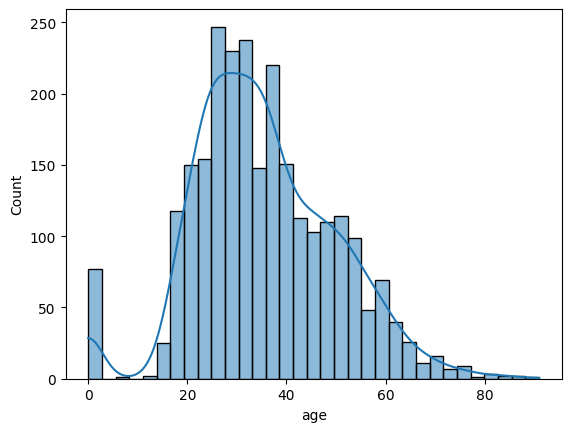

In [ ]:
# Create a histogram with KDE plot for the 'age' column in the grouped_fatalities DataFrame
sns.histplot(grouped_fatalities,x='age',kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

Text(0.5, 1.0, 'KDE Plot by Race')

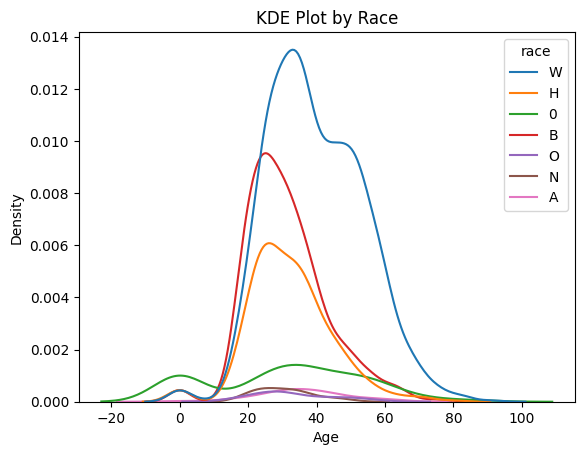

In [ ]:

# Create a KDE plot with different colors for each race
sns.kdeplot(grouped_fatalities, x='age',hue='race')
# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot by Race')

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
# Count the number of people killed by police for each race
race_killed=grouped_fatalities.groupby(['race'],as_index=False).agg({'name':pd.Series.count})
# Sort the DataFrame in descending order based on the count of names
race_killed.sort_values('name',ascending=False,inplace=True)
# Print the DataFrame showing the number of people killed by police for each race
race_killed

,race,name
6,W,1201
2,B,618
3,H,423
0,0,195
1,A,39
4,N,31
5,O,28


In [ ]:
# Create a bar plot to visualize the number of people killed by police for each race
fig=px.bar(race_killed,x='race',y='name',labels={'name': '# Race of People Killed'})
# Show the plot
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
# Calculate count of police killings based on signs of mental illness
mental_illness_count=grouped_fatalities.groupby(['signs_of_mental_illness'],as_index=False).agg({'name':pd.Series.count})
# Sort the count in descending order
mental_illness_count.sort_values('name',ascending=False,inplace=True)
# Display the DataFrame with the count of police killings based on signs of mental illness
mental_illness_count

,signs_of_mental_illness,name
0,False,1902
1,True,633


In [ ]:
# Create a bar plot to visualize the count of police killings based on signs of mental illness
fig=px.bar(mental_illness_count,x='signs_of_mental_illness',y='name',labels={'name': '# People Killed with Mental Illiness'})
# Display the bar plot
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?

In [ ]:
# Filter out rows where race is not equal to 0 and group the data by city
city=grouped_fatalities.query('race!=0').groupby(['city']).agg({'name':pd.Series.count})
# Sort the cities in descending order based on the count of police killings
city.sort_values('name',ascending=False,inplace=True)
# Display the resulting DataFrame
city

,name
city,
Los Angeles,36
Phoenix,28
Houston,26
Chicago,24
San Antonio,18
...,...
Holland Township,1
Hollywood,1
Hollywood Hills,1


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
# Select the top 10 cities with the highest number of police killings
top_10=city.head(10)

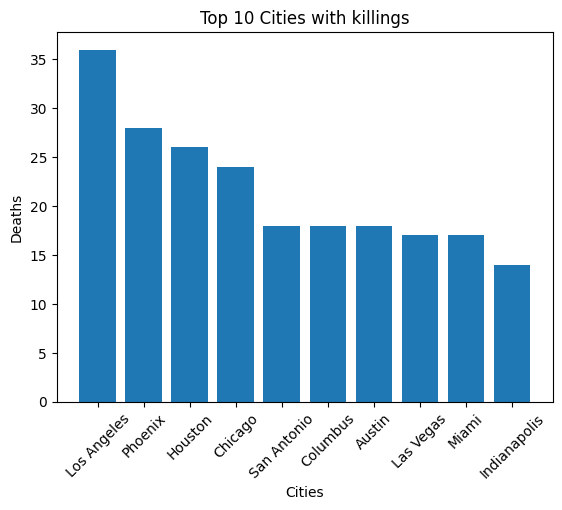

In [ ]:
# Create a bar chart
plt.bar(top_10.index, top_10['name'])

# Add labels and title to the chart
plt.xlabel('Cities')
plt.ylabel('Deaths')
plt.title('Top 10 Cities with killings')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the chart
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
# Filter the data to include only valid race values
city_vs_race=grouped_fatalities.query('race!=0')
# Group the data by city and race, and count the number of people killed
city_vs_race=city_vs_race.groupby(['city','race'],as_index=False).agg({'name':pd.Series.count})

In [ ]:
merge=pd.merge(top_10,city_vs_race, on=['city'])
merge.head()

,city,name_x,race,name_y
0,Los Angeles,36,A,1
1,Los Angeles,36,B,10
2,Los Angeles,36,H,19
3,Los Angeles,36,W,6
4,Phoenix,28,B,2


In [ ]:
# Create a bar chart to visualize the top 10 cities by race
fig = px.bar(merge, x="city", y="name_y", color="race", title="top10 cities by race", labels={'name_y':'No. of Deaths'})
# Update the x-axis category order to be in descending order based on the total count of deaths
fig.update_layout(xaxis={'categoryorder':'total descending'})
# Display the figure
fig.show()

In [ ]:
# Group the fatalities by state and count the number of killings
by_states=grouped_fatalities.groupby(['state'],as_index=False).agg({'name':pd.Series.count})
by_states
# Create a choropleth map to visualize the number of killings by state
fig=px.choropleth(by_states,locations='state',locationmode='USA-states',color='name',scope='usa',color_continuous_scale='Viridis',labels={'name': 'Killings'})
# Display the figure
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
from datetime import datetime
import matplotlib.dates as mdates
# Convert the "date" column to datetime format
grouped_fatalities['date']=pd.to_datetime(grouped_fatalities['date'])

In [ ]:
# Group the 'grouped_fatalities' DataFrame by the "date" column and count the occurrences of each date.
# The resulting DataFrame 'by_date' contains two columns: "date" and "name". The "date" column represents
# the unique dates in the dataset, and the "name" column represents the count of fatalities on each date.
by_date = grouped_fatalities.groupby(["date"], as_index=False).agg({"name": pd.Series.count})
# Convert the "date" column in the 'by_date' DataFrame to a specific date format. Iterate over each date
# in the "date" column using a list comprehension. For each date, extract the year and month and create a
# new 'datetime' object with the day set to 01. Assign the resulting 'datetime' objects back to the "date"
# column in the 'by_date' DataFrame.

# by_date.groupby([by_date.date.dt.year, by_date.date.dt.month]).agg({"name": pd.Series.count})
# by_date.rolling(window=6).mean()
by_date["date"] = [ pd.to_datetime(f"{n.year}-{n.month}-01") for n in by_date.date]
# Group the 'by_date' DataFrame again, this time by the modified "date" column. Count the occurrences of
# each date and aggregate the results. The resulting DataFrame 'by_date' now contains two columns: "date"
# and "name". The "date" column represents the first day of each month, and the "name" column represents
# the count of fatalities in that month.
by_date = by_date.groupby(["date"], as_index=False).agg({"name": pd.Series.count})
by_date.head()

,date,name
0,2015-01-01,27
1,2015-02-01,27
2,2015-03-01,29
3,2015-04-01,29
4,2015-05-01,28


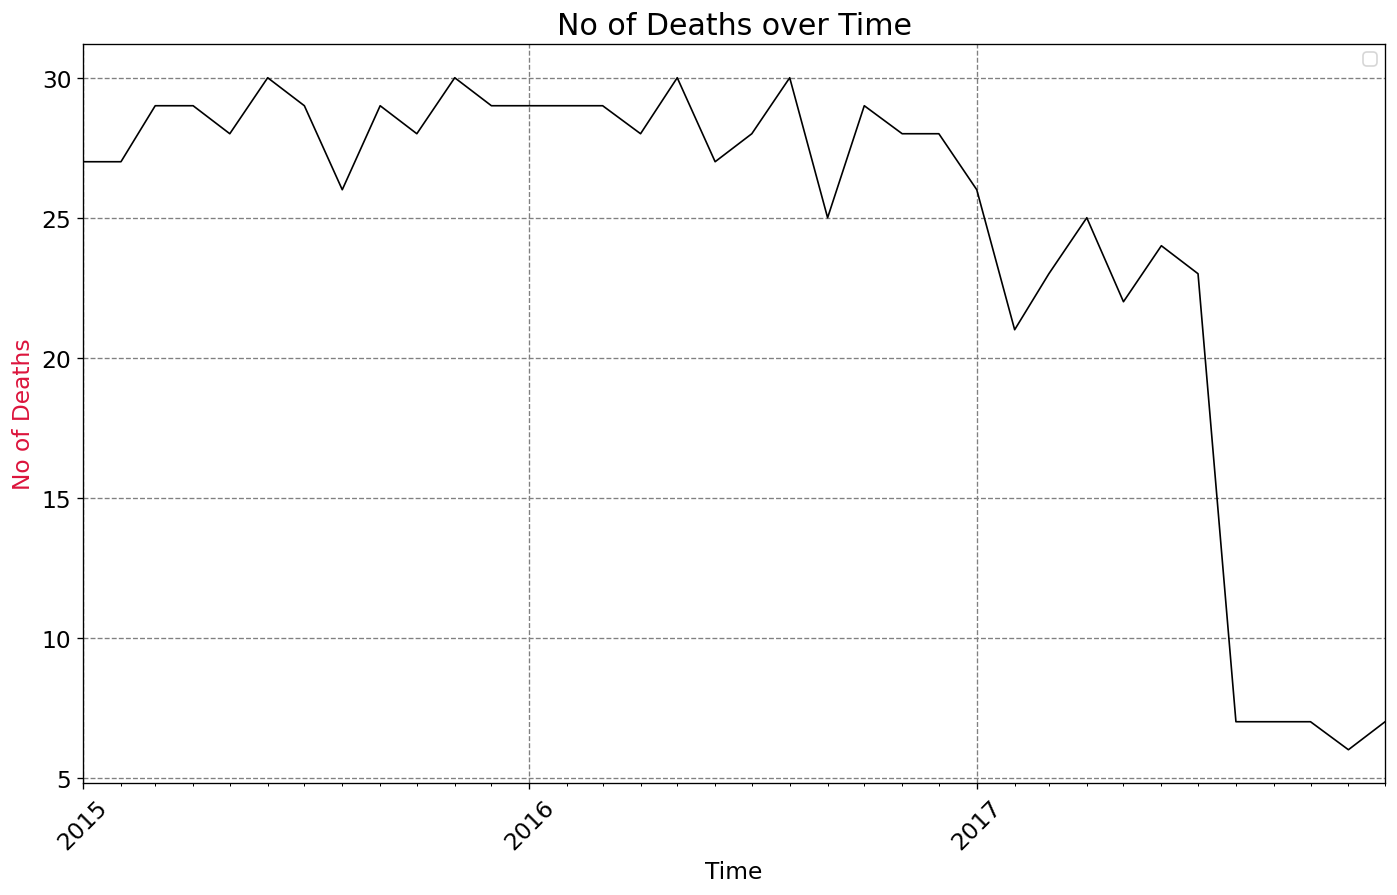

In [ ]:
# Set the figure size and dpi
plt.figure(figsize=(14,8), dpi=120)
# Set the title of the plot
plt.title('No of Deaths over Time', fontsize=18)
# Set the font size for x-axis and y-axis labels
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Get the current axis
ax1 = plt.gca()
# ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# Set the x-axis label
ax1.set_xlabel("Time", fontsize=14)


# ax1.set_ylabel("Births", color='skyblue', fontsize=14)
# Set the y-axis label and color
ax1.set_ylabel("No of Deaths", color="crimson", fontsize=14)
# Set the x-axis limits based on the minimum and maximum dates
ax1.set_xlim([by_date.date.min(), by_date.date.max()])
# ax2.set_ylim([0, 600])

# Configure the major and minor tick locators and formatters for x-axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Plot the line for the number of deaths over time
ax1.plot(by_date.date, by_date.name, color='black', linewidth=1)
# ax1.plot(df_month_after.date, df_month_after.pct_deaths, 'skyblue', linewidth=3, label="After handwashing")
# ax1.plot(roll_df_before.index, roll_df_before.pct_deaths, color='crimson', linewidth=2, linestyle='dashed', label="6m moving avg")

# Add gridlines to the plot
ax1.grid(color='grey', linestyle='--')

# Show the legend
ax1.legend()

# Display the plot
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).